In [23]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf

from scipy.stats import norm, t


In [2]:
def get_stock_data(ticker, start_date, end_date):
    """Return stock closing prices for a given ticker and date range.

    Parameters
    ----------
    ticker : str
        Stock ticker.
    start_date : datetime.datetime
        Start date.
    end_date : datetime.datetime
        End date.

    Returns
    -------
    data : pandas.DataFrame
        Stock data.
    """
    df = yf.download(ticker, start=start_date, end=end_date)
    data = df[["Close"]]
    data.columns = [ticker]
    print(data.head())
    return data

GCARSOA1.MX - Grupo Carso

In [7]:
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime.now()

stock_data = get_stock_data("GCARSOA1.MX", start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
            GCARSOA1.MX
Date                   
2010-01-04    20.284569
2010-01-05    20.035229
2010-01-06    20.108562
2010-01-07    20.411682
2010-01-08    20.802805


<Axes: title={'center': 'Grupo Carso, S.A.B. de C.V. stock closing prices (2010-today)'}, xlabel='Date'>

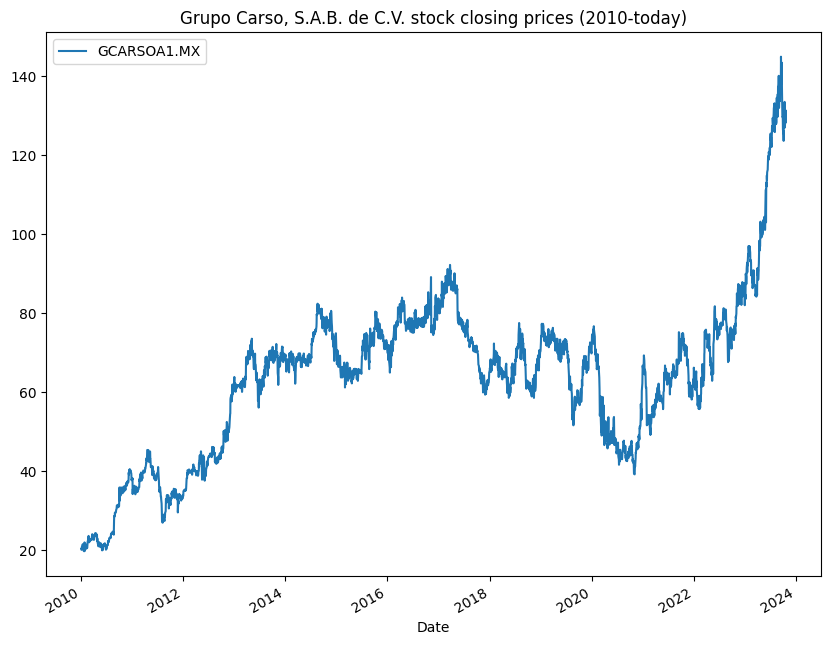

In [9]:
stock_data.plot(figsize=(10, 8), title="Grupo Carso, S.A.B. de C.V. stock closing prices (2010-today)")

In [10]:
daily_returns = stock_data.diff().dropna()

<Axes: title={'center': 'Grupo Carso, S.A.B. de C.V. daily returns (2010-today)'}, xlabel='Date'>

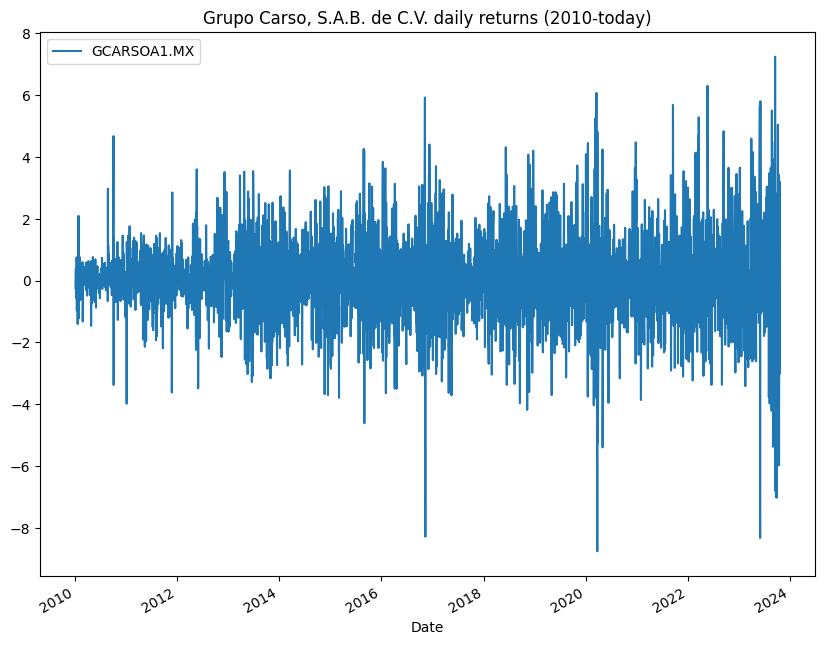

In [11]:
daily_returns.plot(figsize=(10, 8), title="Grupo Carso, S.A.B. de C.V. daily returns (2010-today)")

array([[<Axes: title={'center': 'GCARSOA1.MX'}>]], dtype=object)

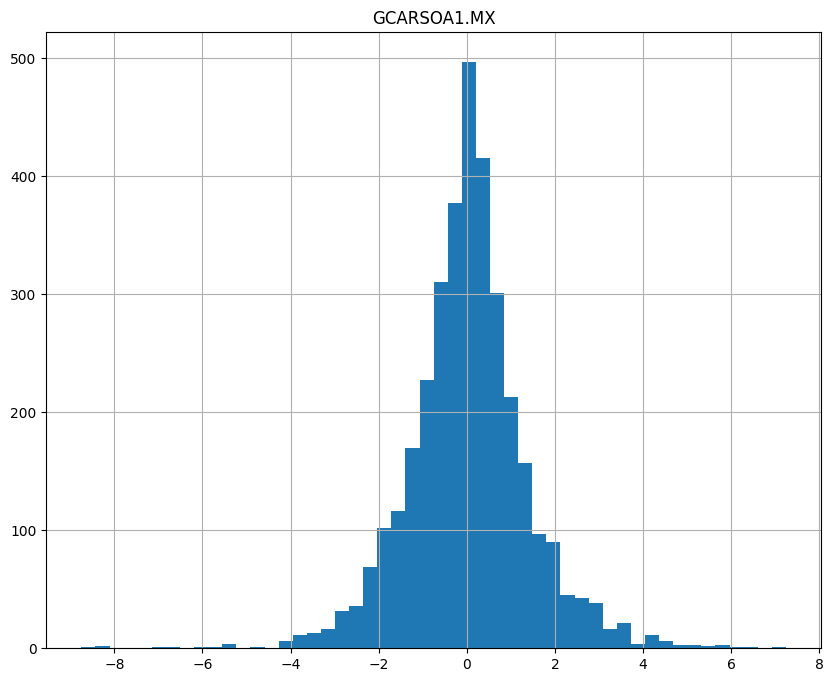

In [14]:
daily_returns.hist(figsize=(10, 8), bins=50)

In [15]:
daily_returns.describe()

,GCARSOA1.MX
count,3465.000000
mean,0.031436
std,1.368298
min,-8.750000
25%,-0.669998
50%,0.029999
75%,0.709999
max,7.240005


In [16]:
daily_returns.kurtosis()

GCARSOA1.MX    3.277373
dtype: float64

In [18]:
# Sesgo
daily_returns.skew()

GCARSOA1.MX   -0.029813
dtype: float64

In [20]:
# VaR no parametrico
VaR_non_param = daily_returns.quantile(0.05)

In [22]:
# VaR parametrico
mean = daily_returns.mean()
std = daily_returns.std()

# Normal distribution
VaR_param_norm = norm.ppf(0.05, mean, std)

# T distribution

# Grados de libertad
df = len(daily_returns) - 1

VaR_param_t = t.ppf(0.05, df, mean, std)


In [ ]:
#